In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

### Parameters

In [2]:
TIME_STEPS = 28  # height of the image
INPUT_SIZE = 28  # width of the image
BATCH_SIZE = 128
OUTPUT_SIZE = 10  # 10 classes to classify
CELL_SIZE = 50
LEARNING_RATE = 0.001
EPOCHS = 30

### Data preparation

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [4]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
X_train = X_train.reshape(-1,28,28)/255
X_test = X_test.reshape(-1,28,28)/255
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

### Modeling

In [6]:
model = Sequential()
model.add(SimpleRNN(batch_input_shape=(BATCH_SIZE, TIME_STEPS, INPUT_SIZE), units=CELL_SIZE)) # activation is tanh by default
model.add(Dense(OUTPUT_SIZE, activation='softmax'))

In [7]:
opt = Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=opt ,loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
history=model.fit(X_train, y_train,validation_data=(X_test,y_test),batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 9s 145us/sample - loss: 0.8444 - accuracy: 0.7390 - val_loss: 0.4664 - val_accuracy: 0.8614
Epoch 2/30
60000/60000 [==============================] - 7s 121us/sample - loss: 0.4099 - accuracy: 0.8791 - val_loss: 0.3302 - val_accuracy: 0.9075
Epoch 3/30
60000/60000 [==============================] - 7s 119us/sample - loss: 0.3153 - accuracy: 0.9081 - val_loss: 0.2749 - val_accuracy: 0.9225
Epoch 4/30
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2688 - accuracy: 0.9219 - val_loss: 0.2435 - val_accuracy: 0.9331
Epoch 5/30
60000/60000 [==============================] - 7s 122us/sample - loss: 0.2350 - accuracy: 0.9319 - val_loss: 0.2224 - val_accuracy: 0.9378
Epoch 6/30
60000/60000 [==============================] - 7s 120us/sample - loss: 0.2149 - accuracy: 0.9375 - val_loss: 0.2148 - val_accuracy: 0.9385
Epoch 7/30
60000/60000 [==========================

### Evaluation

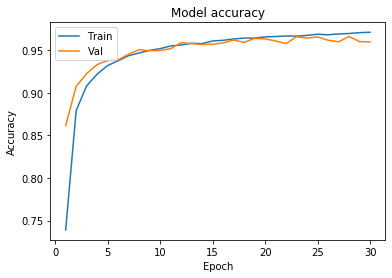

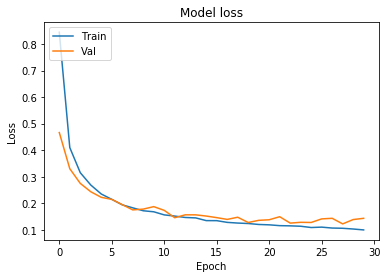

In [9]:
epoch_range=range(1,EPOCHS+1)
plt.plot(epoch_range,history.history['accuracy'])
plt.plot(epoch_range,history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
# plt.xticks([x for x in range(epoch+1)])
plt.legend(['Train','Val'],loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
# plt.xticks([x for x in range(epoch+1)])
plt.legend(['Train','Val'],loc='upper left')
plt.show()